<a href="https://colab.research.google.com/github/nikeshgamal24/Car-Price-Prediction-Project/blob/main/Car_Price_Prediction_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings
%matplotlib inline

https://www.kaggle.com/datasets/bhavikjikadara/car-price-prediction-dataset/data

In [6]:
data = pd.read_csv("car_prediction_data.csv")

In [7]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [8]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
for col in data.columns:
  print(f"Column Name: {col},   Data Type: {data[col].dtype}")
  print(f"Unique Value Count: {len(data[col].unique())}")
  print("--"*20)

Column Name: Car_Name,   Data Type: object
Unique Value Count: 98
----------------------------------------
Column Name: Year,   Data Type: int64
Unique Value Count: 16
----------------------------------------
Column Name: Selling_Price,   Data Type: float64
Unique Value Count: 156
----------------------------------------
Column Name: Present_Price,   Data Type: float64
Unique Value Count: 147
----------------------------------------
Column Name: Kms_Driven,   Data Type: int64
Unique Value Count: 206
----------------------------------------
Column Name: Fuel_Type,   Data Type: object
Unique Value Count: 3
----------------------------------------
Column Name: Seller_Type,   Data Type: object
Unique Value Count: 2
----------------------------------------
Column Name: Transmission,   Data Type: object
Unique Value Count: 2
----------------------------------------
Column Name: Owner,   Data Type: int64
Unique Value Count: 3
----------------------------------------


In [17]:
print(f"Unique Values of Fuel_Type: {data['Fuel_Type'].unique()}")
print(f"Unique Values of Seller_Type: {data['Seller_Type'].unique()}")
print(f"Unique Values of Transmission: {data['Transmission'].unique()}")
print(f"Unique Values of Owner: {data['Owner'].unique()}")

Unique Values of Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Unique Values of Seller_Type: ['Dealer' 'Individual']
Unique Values of Transmission: ['Manual' 'Automatic']
Unique Values of Owner: [0 1 3]


In [18]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
## 1. Missing values
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [21]:
## 2. duplicated records
data[data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [26]:
## Remove duplicate values from the dataset

In [27]:
data.drop_duplicates(keep="first",inplace=True)

In [28]:
data[data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [29]:
## 3. Outliers

<Axes: >

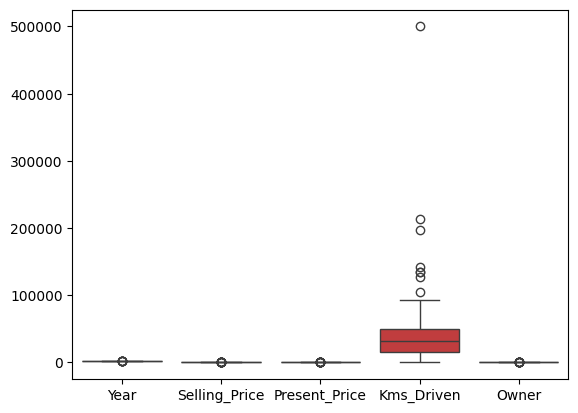

In [30]:
sns.boxplot(data=data)

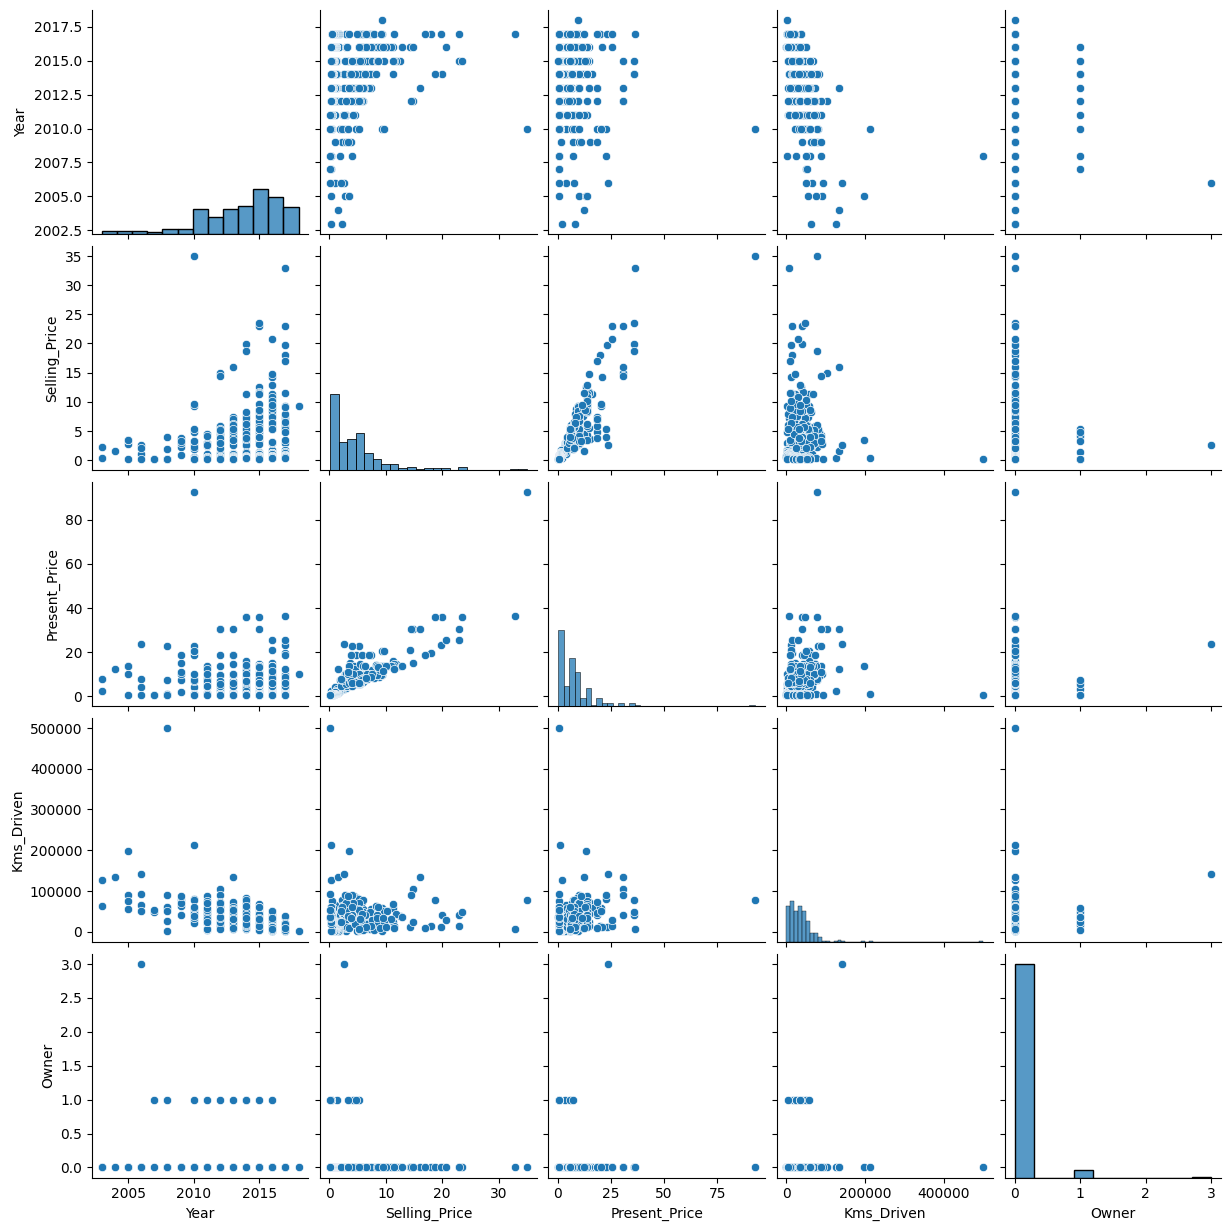

In [31]:
sns.pairplot(data)

In [34]:
Q1 = data['Kms_Driven'].quantile(0.25)
Q3 = data['Kms_Driven'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
outliers = data[(data['Kms_Driven'] < lower_bound) | (data['Kms_Driven'] > upper_bound)]

In [36]:
upper_bound, lower_bound

(np.float64(99708.75), np.float64(-35825.25))

In [35]:
outliers

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [37]:
Q1 = data['Present_Price'].quantile(0.25)
Q3 = data['Present_Price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
outliers = data[(data['Present_Price'] < lower_bound) | (data['Present_Price'] > upper_bound)]

In [38]:
upper_bound, lower_bound

(np.float64(22.8), np.float64(-11.760000000000002))

In [40]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


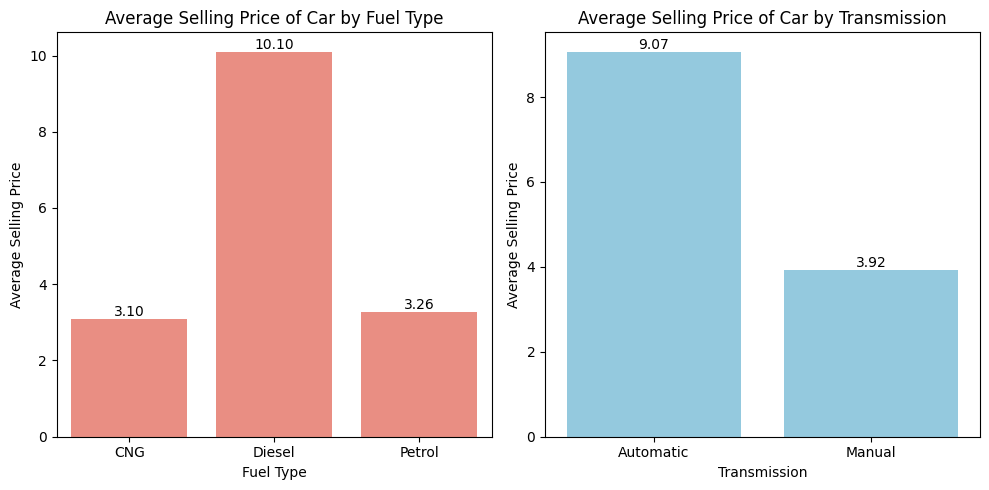

In [44]:
import seaborn as sns

## calucate the average charges based on particular feature
avg_charges_by_fuel_type = data.groupby("Fuel_Type")["Selling_Price"].mean().reset_index()
avg_charges_by_transmission = data.groupby("Transmission")["Selling_Price"].mean().reset_index()

# Create subplots: 1 row, 2 columns to accommodate the two remaining plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # Adjusted figsize for 1x2 layout

# Line plot for average charges by sex (left plot)
# Now accessed directly as axes[0] in a single-row subplot
sns.barplot(ax=axes[0], x='Fuel_Type', y='Selling_Price', data=avg_charges_by_fuel_type, color='salmon')
axes[0].set_title('Average Selling Price of Car by Fuel Type')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Average Selling Price')

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')

# Line plot for average charges by BMI (right plot)
# Now accessed directly as axes[1] in a single-row subplot
sns.barplot(ax=axes[1], x='Transmission', y='Selling_Price', data=avg_charges_by_transmission, color='skyblue')
axes[1].set_title('Average Selling Price of Car by Transmission')
axes[1].set_xlabel('Transmission')
axes[1].set_ylabel('Average Selling Price')

# Add value labels on bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()

In [45]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


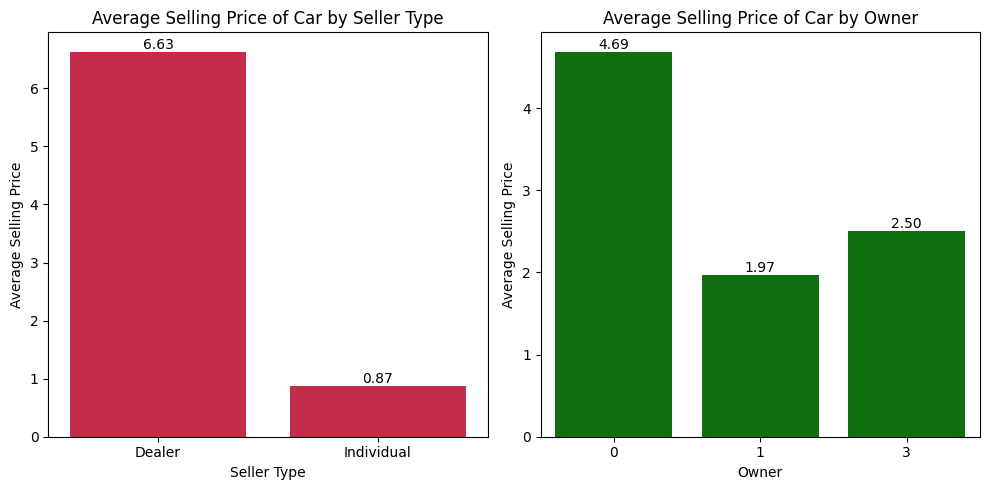

In [48]:
import seaborn as sns

## calucate the average charges based on particular feature
avg_charges_by_seller_type = data.groupby("Seller_Type")["Selling_Price"].mean().reset_index()
avg_charges_by_owner = data.groupby("Owner")["Selling_Price"].mean().reset_index()

# Create subplots: 1 row, 2 columns to accommodate the two remaining plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # Adjusted figsize for 1x2 layout

# Line plot for average charges by sex (left plot)
# Now accessed directly as axes[0] in a single-row subplot
sns.barplot(ax=axes[0], x='Seller_Type', y='Selling_Price', data=avg_charges_by_seller_type, color='crimson')
axes[0].set_title('Average Selling Price of Car by Seller Type')
axes[0].set_xlabel('Seller Type')
axes[0].set_ylabel('Average Selling Price')

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f')

# Line plot for average charges by BMI (right plot)
# Now accessed directly as axes[1] in a single-row subplot
sns.barplot(ax=axes[1], x='Owner', y='Selling_Price', data=avg_charges_by_owner, color='green')
axes[1].set_title('Average Selling Price of Car by Owner')
axes[1].set_xlabel('Owner')
axes[1].set_ylabel('Average Selling Price')

# Add value labels on bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()

In [49]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


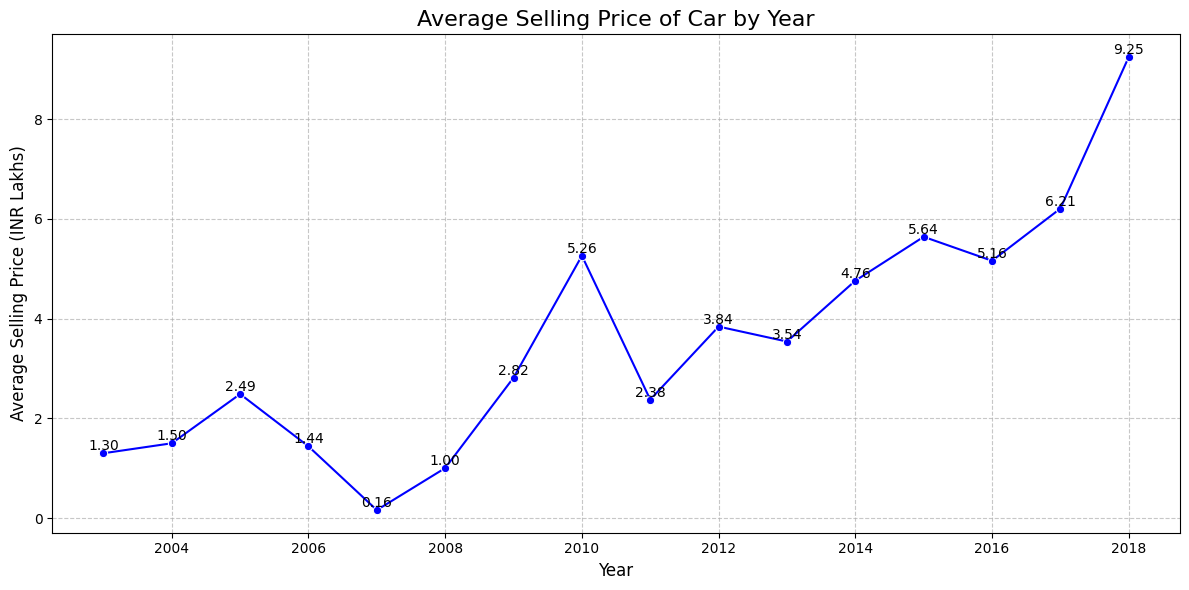

In [56]:

# Calculate the average selling price based on year
avg_charges_by_year = data.groupby("Year")["Selling_Price"].mean().reset_index()

# Create a single line plot for average selling price by year
plt.figure(figsize=(12, 6)) # Increased figure size for better label visibility and text
ax = sns.lineplot(x="Year", y="Selling_Price", data=avg_charges_by_year, color="blue", marker='o')

# Set appropriate title and labels for the plot using the 'ax' object
ax.set_title('Average Selling Price of Car by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Selling Price (INR Lakhs)', fontsize=12) # Clarified unit for Selling Price

# Add the value of the points on the plot
# Iterate over each row in the aggregated DataFrame
for index, row in avg_charges_by_year.iterrows():
    # Annotate each point with its 'Selling_Price' value
    # x: Year, y: Selling_Price, text: formatted Selling_Price
    # ha='center', va='bottom' positions the text nicely
    # fontsize and color for better readability
    plt.text(row['Year'], row['Selling_Price'],
             f"{row['Selling_Price']:.2f}", # Format to 2 decimal places
             ha='center', va='bottom', fontsize=10, color='black')


# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()


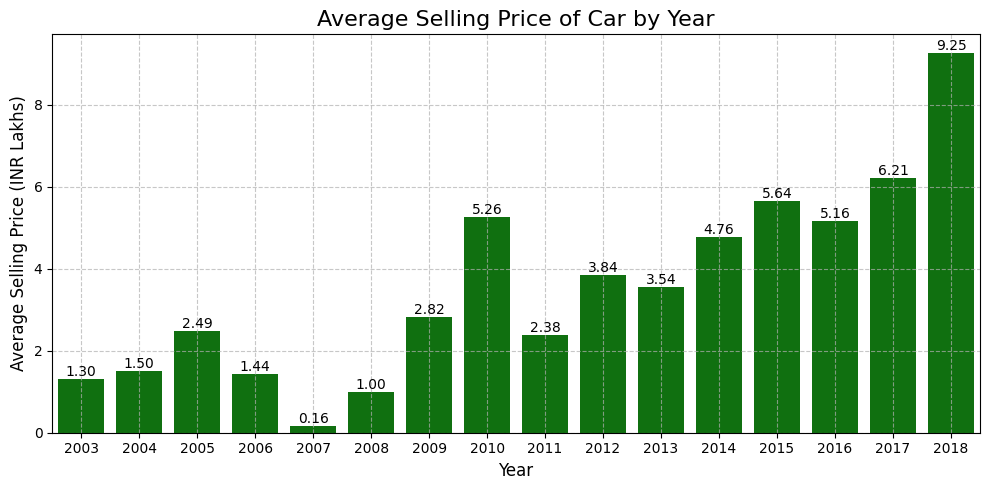

In [62]:

# Calculate the average selling price based on year
avg_charges_by_year = data.groupby("Year")["Selling_Price"].mean().reset_index()

# Create a single bar plot for average selling price by year
plt.figure(figsize=(10, 5)) # Increased figure size for better label visibility and text
ax = sns.barplot(x="Year", y="Selling_Price", data=avg_charges_by_year, color="green") # Changed to barplot

# Set appropriate title and labels for the plot using the 'ax' object
ax.set_title('Average Selling Price of Car by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Selling Price (INR Lakhs)', fontsize=12) # Clarified unit for Selling Price

# Add value labels on bars
for container in ax.containers: # Use 'ax.containers' for the current axes
    ax.bar_label(container, fmt='%.2f') # Format to 2 decimal places

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()
